# Introduction to Classification with Neural Networks in TensorFlow Tutorial

Okay, we've seen how to deal with a regression problem in TensorFlow, let's look at how we can approach a classification problem.

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a classification model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs) 
    - "What class do the inputs belong to?"
- Creating custom data to view and fit
- Steps in modelling for binary and mutliclass classification
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
      - Finding the best learning rate
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
  - Improving a model
- The power of non-linearity
- Evaluating classification models
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)

## How you can use this notebook

You can read through the descriptions and the code (it should all run), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to **write more code**.

# Typical architecture of a classification neural network 

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Don't worry if not much of the above makes sense right now, we'll get plenty of experience as we go through this notebook.

Let's start by importing TensorFlow as the common alias `tf`. For this notebook, make sure you're using version 2.x+.

In [2]:
import tensorflow as tf
tf.__version__

'2.5.0'

# Creating data to view and fit

We could start by importing a classification dataset but let's practice making some of our own classification data.

> 🔑 **Note:** It's a common practice to get you and model you build working on a toy (or simple) dataset before moving to your actual problem. Treat it as a rehersal experiment before the actual experiment(s).

Since classification is predicting whether something is one thing or another, let's make some data to reflect that.

To do so, we'll use Scikit-Learn's [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) function.



In [3]:
import numpy as np
from sklearn.datasets import make_circles
# np.random.seed(0)

n_samples = 1000
#create circles
X, y = make_circles(n_samples, noise=.03, random_state=42)

In [4]:
#features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
#labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Viusalize data

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

circles = pd.DataFrame({"X0:":X[:, 0], "X1:":X[:, 1], "labels":y})
circles

,X0:,X1:,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


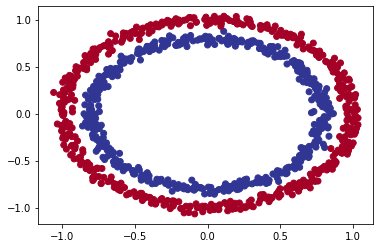

In [7]:
#plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

###Input and Output shapes

In [8]:
#shapes of i/o and sizes
X.shape, y.shape, len(X), len(y)

((1000, 2), (1000,), 1000, 1000)

In [9]:
#Look at first row/data
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modelling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.

In [35]:
#set randomn seed
tf.random.set_seed(42)

#1. create model
cls_model1 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(1000, 2)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                               
])

#2.compile
cls_model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    # optimizer=tf.keras.optimizers.SGD(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

#3.fit
cls_model1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.7456 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7320 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7230 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7171 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7132 - accuracy: 0.4570
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7105 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7081 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7064 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7034 - accuracy: 0.4550
Epoch 11/

In [36]:
#evaluate
cls_model1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.9810


[0.5756625533103943, 0.9810000061988831]

In [37]:
cls_model1.predict(X)

array([[0.5443969 ],
       [0.6256944 ],
       [0.5829952 ],
       [0.5188227 ],
       [0.41716382],
       [0.49924055],
       [0.5709491 ],
       [0.55358565],
       [0.52811456],
       [0.3571363 ],
       [0.51072794],
       [0.3832329 ],
       [0.5111562 ],
       [0.53427607],
       [0.5519343 ],
       [0.5434676 ],
       [0.40312818],
       [0.5449987 ],
       [0.5573389 ],
       [0.441238  ],
       [0.56791276],
       [0.3284744 ],
       [0.44405407],
       [0.5420219 ],
       [0.410835  ],
       [0.49082538],
       [0.42072272],
       [0.52035964],
       [0.5258525 ],
       [0.54811364],
       [0.45389524],
       [0.34253937],
       [0.5817068 ],
       [0.4489832 ],
       [0.40033472],
       [0.37393418],
       [0.5418761 ],
       [0.5156297 ],
       [0.53826654],
       [0.43193576],
       [0.45839635],
       [0.41453943],
       [0.42087987],
       [0.5044733 ],
       [0.38369828],
       [0.41612607],
       [0.5021547 ],
       [0.561

Let's make some visualizations to see what's happening.

> 🔑 **Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function `plot_decision_boundary()` which:
* Takes in a trained model, features (`X`) and labels (`y`).
* Creates a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different `X` values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

If this sounds confusing, let's see it in code and then see the output.

> 🔑 **Note:** If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

In [38]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


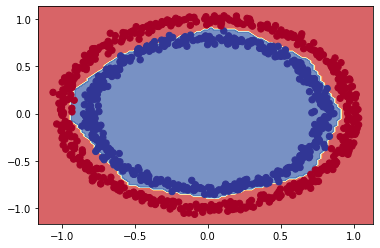

In [39]:
#
plot_decision_boundary(cls_model1, X, y)

###Evaluating and Improving the model

In [40]:
#split dataset to create train and test
# from sklearn.

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [42]:
#set randomn seed
tf.random.set_seed(42)

#earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5)
#1. create model
cls_model1 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(1000, 2)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                               
])

#2.compile
cls_model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

#3.fit
training_history = cls_model1.fit(X, y, epochs=500, callbacks=[callback])

Epoch 1/500
32/32 [==============================] - 1s 1ms/step - loss: 0.7150 - accuracy: 0.4480
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.4660
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.4920
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5420
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5300
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.5320
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.7030
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6160
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6710
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.7180
Epoch 11/

In [43]:
#eval
cls_model1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 1.0000


[0.018190648406744003, 1.0]

doing binary classifcation...
doing binary classifcation...


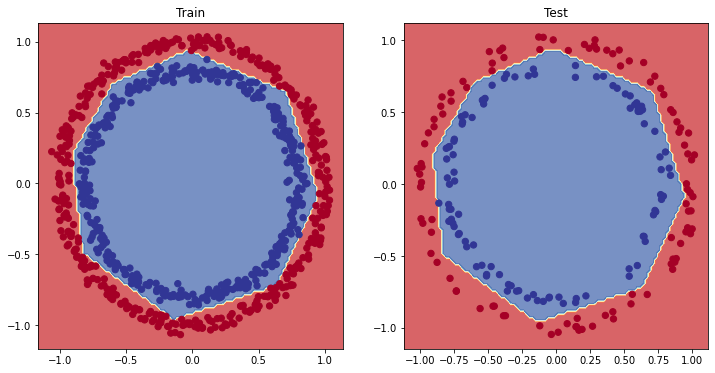

In [44]:
#plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(cls_model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(cls_model1, X_test, y_test)
plt.show()

###Plot loss

In [45]:
#convert history object into pd DF
# training_history.history
pd.DataFrame(training_history.history)

,loss,accuracy
0,0.715016,0.448
1,0.700546,0.466
2,0.691526,0.492
3,0.685821,0.542
4,0.679910,0.530
...,...,...
184,0.023220,0.998
185,0.024124,0.998
186,0.023687,0.999
187,0.022942,0.999


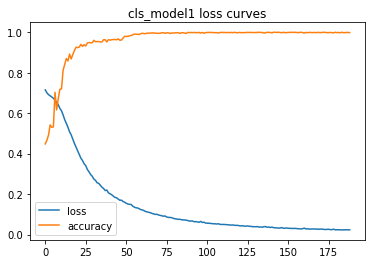

In [46]:
#plot loss curves
pd.DataFrame(training_history.history).plot()
plt.title("cls_model1 loss curves");


Finding the best learning rate

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:

A learning rate callback.
You can think of a callback as an extra piece of functionality you can add to your model while its training.
Another model (we could use the same ones as above, we we're practicing building models here).
A modified loss curves plot.

We'll go through each with code, then explain what's going on.

🔑 Note: The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.



In [47]:
cls_model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1000, 10)          30        
_________________________________________________________________
dense_17 (Dense)             (None, 1000, 1)           11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
cls_model_9 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(1000, 2)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
cls_model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
training_history = cls_model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7511 - accuracy: 0.5013
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7496 - accuracy: 0.5013
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7479 - accuracy: 0.5013
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7462 - accuracy: 0.5013
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7443 - accuracy: 0.5013
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7424 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7402 - accuracy: 0.5013
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7381 - accuracy: 0.5013
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7357 - accuracy: 0.4950
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7334 - accuracy: 0.4900
Epoch 11/

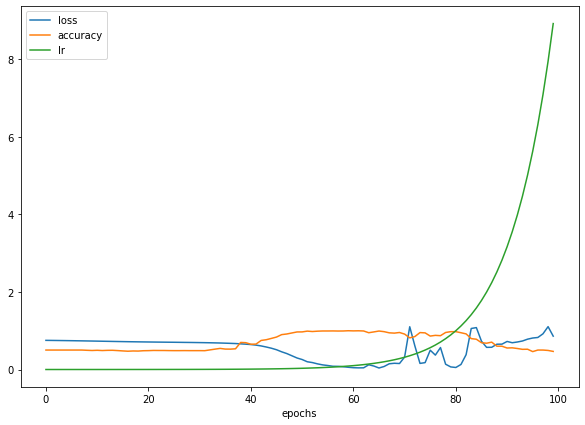

In [49]:
# Checkout the history
pd.DataFrame(training_history.history).plot(figsize=(10,7), xlabel="epochs");



As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.


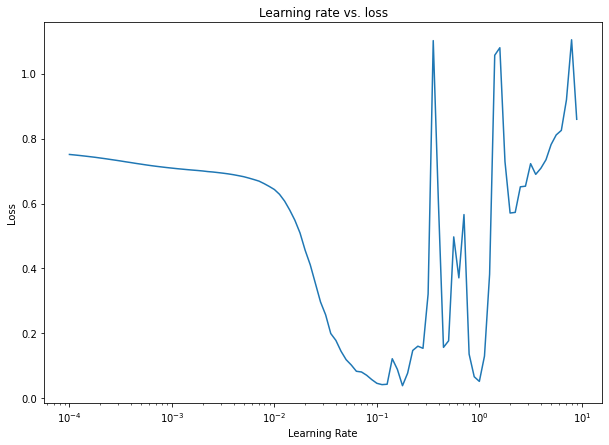

In [50]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, training_history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between 0.01 ($10^{-2}$) and 0.02.

Now we've estimated the ideal learning rate (we'll use 0.02) for our model, let's refit it.

In [52]:
X_train.shape, y_train.shape

((800, 2), (800,))

In [53]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
cls_model_9 = tf.keras.Sequential([
  # tf.keras.layers.Dense(4, activation="relu"),
  # tf.keras.layers.InputLayer(input_shape=(1000, 2)),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
cls_model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
training_history = cls_model_9.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.7081 - accuracy: 0.4412
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5013
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.5500
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.6637
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.6062
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6222 - accuracy: 0.7050
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5896 - accuracy: 0.8413
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5609 - accuracy: 0.8363
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5125 - accuracy: 0.9237
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.9588
Epoch 11/20
25/25 [